#### selenium 패키지 모듈 이용한 자동 크롤링
- selenium
    - webdriver라는 API를 통해 운영체제에 설치된 웹 브라우저를 제어하는 함수를 포함한 패키지
    - 써드파티라이브러리이기 때문에 설치 해 줘야 함
    - prompt 에서 설치
        -!pip install selenium

In [4]:
# !pip install selenium

In [35]:
import selenium
from selenium import webdriver
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By # 셀레니움 4.0부터 포함된 객체 (모듈)

- selenium은 브라우저를 컨트롤하는 기능이기 때문에 webdriver 프로그램을 사용
    - webdriver는 브라우저 종류에 따라 브라우저 제작 업체에서 제공
    
### 크롬드라이버 다운로드
- https://chromedriver.chromium.org/downloads

### 크롬 버전 확인
- 메뉴 - 도움말 - 크롬정보

- **공식site : https://www.selenium.dev/documentation/webdriver/getting_started/upgrade_to_selenium_4/**
 - By 모듈 파라미터 변경 after By.xxx는 아래 함수를 참고

### 관련 메서드
- 드라이버 객체 생성
    - webdriver.브라우저명(드라이버가 저장된 경로)
    - driver = webdriver.Chrome('./driver/chromedriver')
- 드라이버객체.get() : url에 요청 메서드 (소스반환)

- findElement() : 코드에서 조건에 맞는 태그객체 중 처음 나오는 태그객체(find)
- findElement() : 코드에서 조건에 맞는 모든 태그객체(findAll)

- 조건 생성
    - from selenium.webdriver.common.by import By
    - By.xxx 객체 
    
    - driver.find_element(By.CLASS_NAME, "information")
    - driver.find_element(By.CSS_SELECTOR, "#fname")
    - driver.find_element(By.ID, "lname")
    - driver.find_element(By.LINK_TEXT, "Selenium Official Page")
    - driver.find_element(By.NAME, "newsletter")
    - driver.find_element(By.PARTIAL_LINK_TEXT, "Official Page")
    - driver.find_element(By.TAG_NAME, "a")
    - driver.find_element(By.XPATH, "//input[@value='f']")
 
- driver가 접근한 페이지의 source 추출 
    - html = driver.page_source

In [36]:
# 1.webdriver 객체 생성
driver = webdriver.Chrome('./driver/chromedriver') # driver가 저장되어 있는 경로 

C:\Users\82107\AppData\Local\Temp\ipykernel_24700\2626587678.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver') # driver가 저장되어 있는 경로


In [37]:
url = 'https://map.naver.com'
driver.get(url)

In [38]:
# driver 통해 화면 캡처
driver.save_screenshot('./crawl_data/sshot.png')

True

In [39]:
driver.close()

## 동적 로그인 진행

In [40]:
# 1.webdriver 객체 생성
driver =  webdriver.Chrome('./driver/chromedriver') # driver가 저장되어 있는 경로 

C:\Users\82107\AppData\Local\Temp\ipykernel_24700\3579331920.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver =  webdriver.Chrome('./driver/chromedriver') # driver가 저장되어 있는 경로


In [41]:
#페이지 접근
url = 'https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com'
driver.get(url)

In [42]:
# id 입력박스 객체 찾기
id_elem = driver.find_element(By.ID, 'id')

In [43]:
type(id_elem)

selenium.webdriver.remote.webelement.WebElement

In [44]:
id_elem.clear()# 기존 data 삭제
# id 값 전달 : element 객체.send_keys(값)
id_elem.send_keys('test')

In [45]:
# 패스워드
#//*[@id='pw']
xpath = '//*[@id="pw"]'
pw_elem = driver.find_element(By.XPATH, xpath)

In [46]:
pw_elem.send_keys('test')

In [47]:
# 로그인 버튼 클릭
# //*[@id="log.login"]
xpath = '//*[@id="log.login"]'
driver.find_element(By.XPATH, xpath).click() # 클릭 이벤트 발생

In [ ]:
driver.close()

-  자동입력 방지 문자가 나타남 
-  send_keys()함수 사용 - 봇으로 인식 
-  해결방법 : 자바스크립트 함수로 진행

### webdriver  통해 script 코드 직접 실행
- driver.execute_script(자바스크립트 코드)
- 자바스크립트 코드 생성
- document.getElementsByName('id')[0].value= id값
- document.getElementsByName('pw')[0].value= pw값

In [63]:
# 자동입력 방지 문자 우회하기위해 브라우저 종료 후 다시 접속
driver = webdriver.Chrome('./driver/chromedriver')
url ='https://nid.naver.com/nidlogin.login' 
driver.get(url)

C:\Users\82107\AppData\Local\Temp\ipykernel_24700\3767184447.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver')


In [64]:
id_input = 'zx0696'
pw_input = 'dltjddyd74!'

In [66]:
driver.execute_script("document.getElementsByName('id')[0].value=\'" + id_input+"\'")


In [65]:
driver.execute_script("document.getElementsByName('pw')[0].value=\'" + pw_input+"\'")

In [67]:
# 로그인 버튼 클릭
xpath='//*[@id="log.login"]'
#로그인 버튼을 찾아서 클릭
driver.find_element(By.XPATH, xpath).click() # 셀레니움 클릭함수

In [68]:
# 메일 페이지로 접근
driver.get('http://mail.naver.com')

In [69]:
html = driver.page_source

In [70]:
soup = BeautifulSoup(html,'html.parser')

<html class="pc win"><head lang="ko"><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,viewport-fit=cover" name="viewport"/><title>받은메일함(713) : 네이버 메일</title><link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="https://ssl.pstatic.net/static/pwe/naver_mail/hdpi_72X72.png" rel="apple-touch-icon-precomposed" sizes="72x72"/><link href="https://ssl.pstatic.net/static/pwe/naver_mail/xhdpi_96x96.png" rel="apple-touch-icon-precomposed" sizes="96x96"/><link href="https://ssl.pstatic.net/static/pwe/naver_mail/xxhpdi_144x144.png" rel="apple-touch-icon-precomposed" sizes="144x144"/><link href="https://ssl.pstatic.net/static/pwe/naver_mail/xxxhpdi_192x192.png" rel="apple-touch-icon-precomposed" sizes="192x192"/><script>window.nhn = {};
      window.gnb_option = {
        gnb_service: "mail",
        gnb_template: "gnb_utf8",
        gnb_logout: "https://www.naver.com",
        gnb_one_naver: 1,
        gnb_item_hide_o
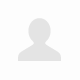
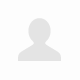

In [71]:
soup

In [72]:
url = 'https://comic.naver.com/genre/bestChallenge.nhn'
driver.get(url)

In [73]:
id_elem = driver.find_element(By.ID,'root')

In [74]:
id_elem

<selenium.webdriver.remote.webelement.WebElement (session="dc20f38fe6affae88ee31d8ba855ba02", element="f4954472-8406-4d61-889c-fd66a705bf26")>

In [75]:
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [76]:
soup.find(id='content').find('ul').find('li').find(class_='text')

<span class="text">비타(VITA)</span>

In [77]:
driver.close()